### Задание 8.1. 
Загрузить библиотеку numpy, файл bin.jpg и преобразовать его с помощью операций дилатация и эрозия. Выбрать ядро, размер которого равен последней цифре в номере списка группы. Здесь ядро 5×5. Выполним сначала операцию дилатации, затем и эрозии

In [1]:
import cv2
import numpy as np
import random
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

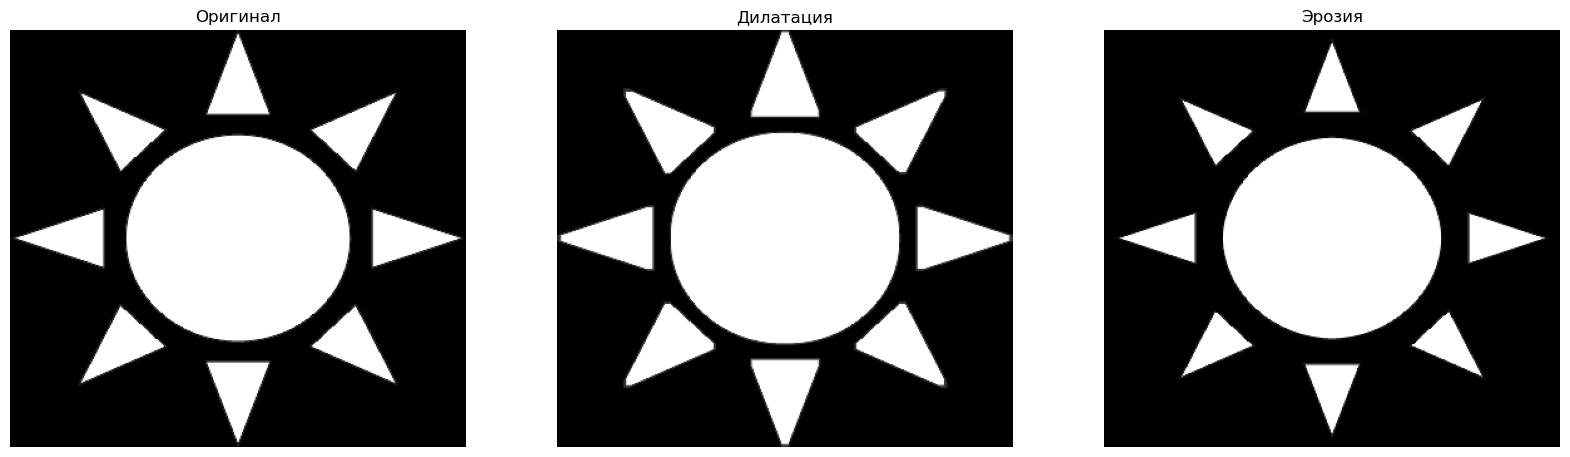

In [2]:
img = cv2.imread('pictures/sun.png',0)

kernel = np.ones((5,5), np.uint8)

dilation = cv2.dilate(img,kernel,iterations = 1)
erosion = cv2.erode(img, kernel,iterations = 1)

plt.figure(figsize=(20,15))

plt.subplot(131),
plt.imshow(img,cmap = 'gray'),plt.title("Оригинал"),
plt.axis('off')

plt.subplot(132),
plt.imshow(dilation,cmap = 'gray'),plt.title("Дилатация"),
plt.axis('off')

plt.subplot(133),
plt.imshow(erosion,cmap = 'gray'),plt.title("Эрозия"),
plt.axis('off');

### Задание 8.2. 
Для демонстрации удаления шума создать зашумленный файл, затем к зашумленному файлу применить операцию открытия.

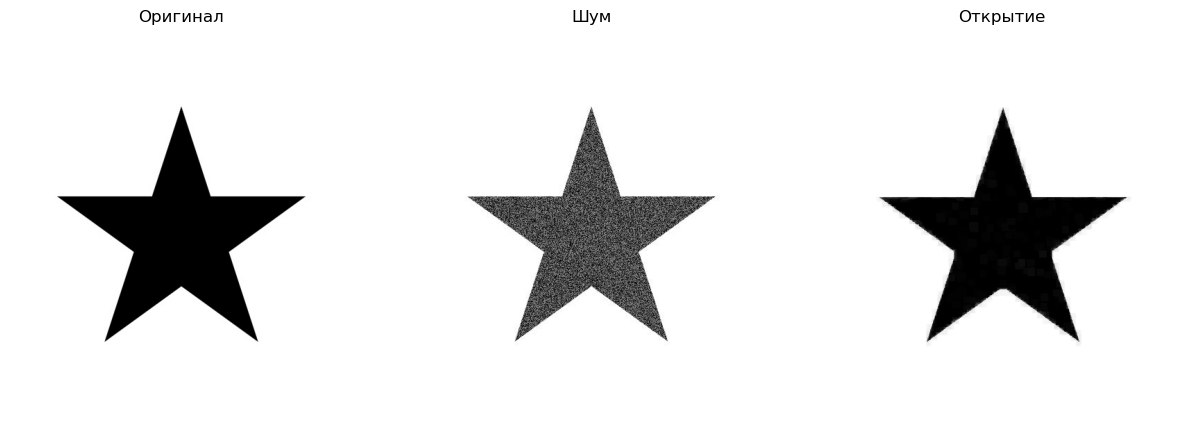

In [3]:
image = Image.open('pictures/star.jpg')

draw = ImageDraw.Draw(image)
width = image.size[0]
height = image.size[1]
pix = image.load()
for i in range(width):
    for j in range(height):
        rand = random.randint(0, 150)
        a = pix[i, j][0] + rand
        b = pix[i, j][1] + rand
        c = pix[i, j][2] + rand
        if (a > 255):
            a = 255
        if (b > 255):
            b = 255
        if (c > 255):
            c = 255
        draw.point((i, j), (a, b, c))
image.save("pictures/median.png", "JPEG")

image = Image.open('pictures/star.jpg')

median = cv2.imread("pictures/median.png", 1)
median = cv2.cvtColor(median,cv2.COLOR_BGR2RGB)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(10, 10)) 
opening = cv2.morphologyEx(median, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(15,15))

plt.subplot(131),
plt.imshow(image,cmap = 'gray'),plt.title("Оригинал"),
plt.axis('off')

plt.subplot(132)
plt.imshow(median, cmap='gray'),plt.title("Шум")
plt.axis('off')

plt.subplot(133)
plt.imshow(opening, cmap='gray'),plt.title("Открытие")
plt.axis('off');

### Задание 8.3. 
Трансформировать цветное изображение в полутоновое при его загрузке, к полутоновому файлу применить операцию открытия.

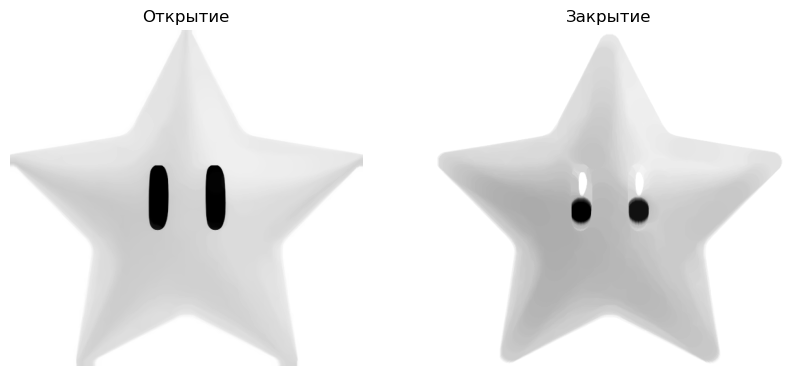

In [4]:
img = cv2.imread('pictures/star_m.jpg',0)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30,30))

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(opening, cmap='gray')
plt.title("Открытие")
plt.axis('off')

plt.subplot(122)
plt.imshow(close, cmap='gray')
plt.title("Закрытие")
plt.axis('off')

plt.show();

### Задание 8.4. 
Трансформировать цветное изображение в полутоновое при его загрузке. Скопировать полутоновое изображение. К первому изображению применить операцию расширения, ко второму эрозию. Затем вычесть из расширенного изображения изображение после эрозии. Результат похож на контур объекта.

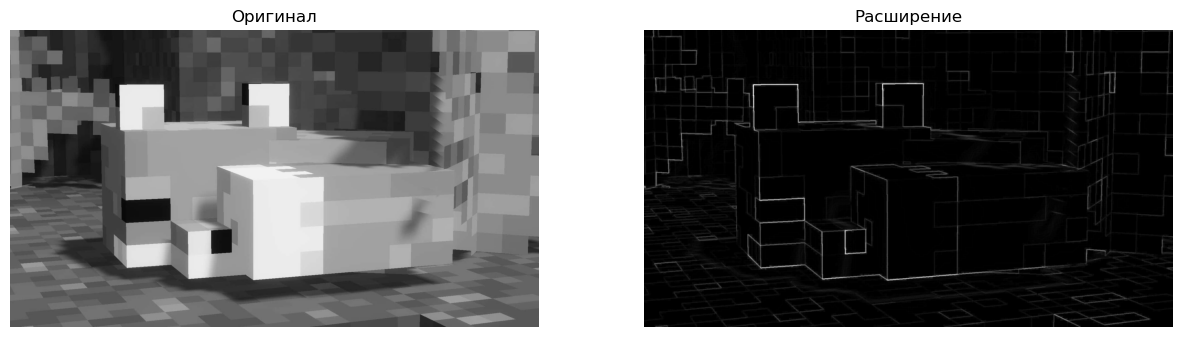

In [5]:
img = cv2.imread('pictures/fox_2.jpg',0)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1 = img.copy()

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

dilation = cv2.dilate(img, kernel, iterations = 1)
erosion = cv2.erode(img1, kernel, iterations = 1)

result = dilation - erosion

plt.figure(figsize=(15,10))

plt.subplot(221)
plt.imshow(img1, cmap='gray')
plt.title("Оригинал")
plt.axis('off')

plt.subplot(222)
plt.imshow(result, cmap='gray')
plt.title("Расширение")
plt.axis('off')

plt.show()

### Задание 8.5. 
Применить операцию цилиндр к изображению, размер ядра равен 40 + №, № – номер по списку группы. (№7, 40 + 7 = 47)

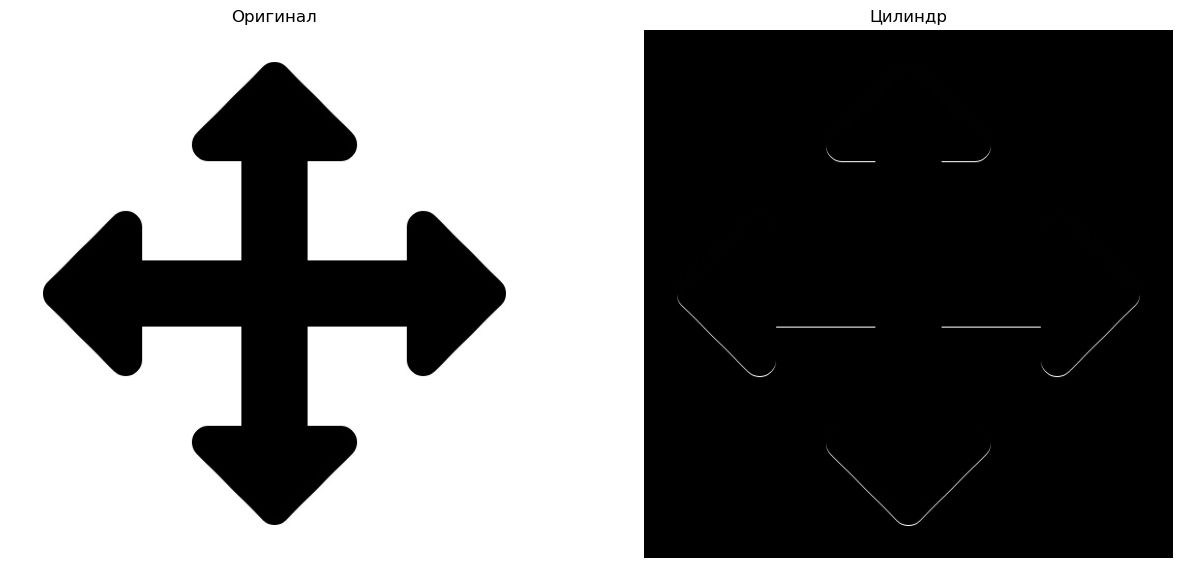

In [6]:
img = cv2.imread('pictures/cross.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

result = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, (47,47))

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.title("Оригинал")
plt.axis('off')

plt.subplot(122)
plt.imshow(result, cmap="gray")
plt.title("Цилиндр")
plt.axis('off')

plt.show();

### Задание 8.6. 
Применить операцию черная шляпа к изображению, размер ядра равен 40 + №, № – номер по списку группы. (№7, 40 + 7 = 47)

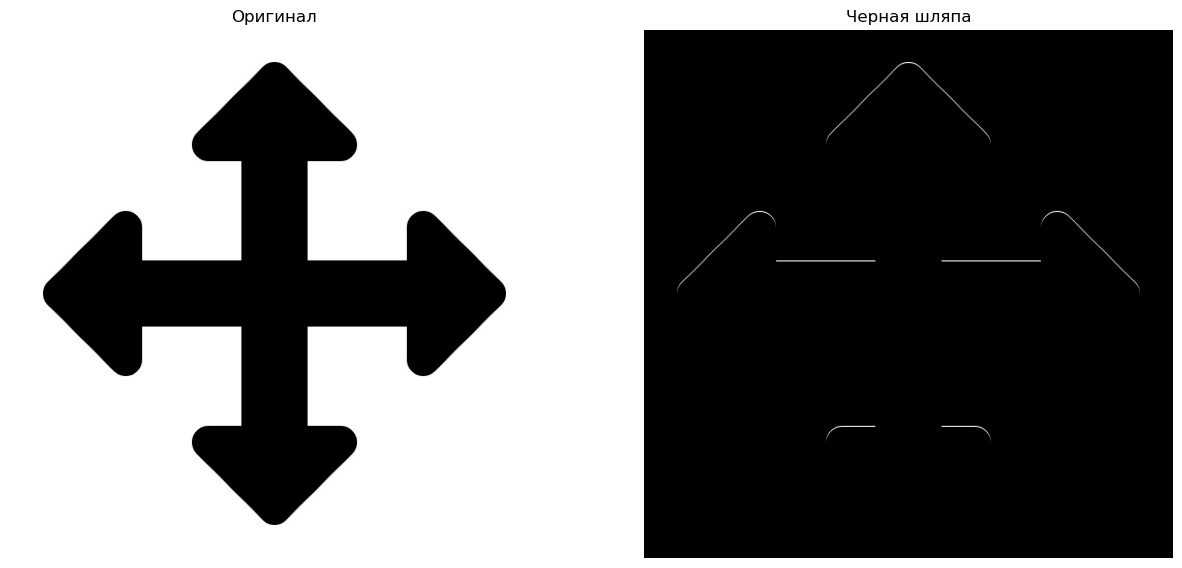

In [7]:
result = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, (47,47))

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.title("Оригинал")
plt.axis('off')

plt.subplot(122)
plt.imshow(result, cmap="gray")
plt.title("Черная шляпа")
plt.axis('off')

plt.show();

### Задание 8.7. 
Изготовить ядро, его размер выбрать из ряда 3/3, 3/5, 5/3, 5/5, 5/7, 3/7, 7/3, 7/5, 5/7, 7/7, номер варианта должен быть равен номеру по списку группы.
Обработать изображение с помощью выбранного ядра и ядра размером 9/9. Сравнить результаты обработки изображения этими ядрами. <br> 
Вариант 7 = 7/3

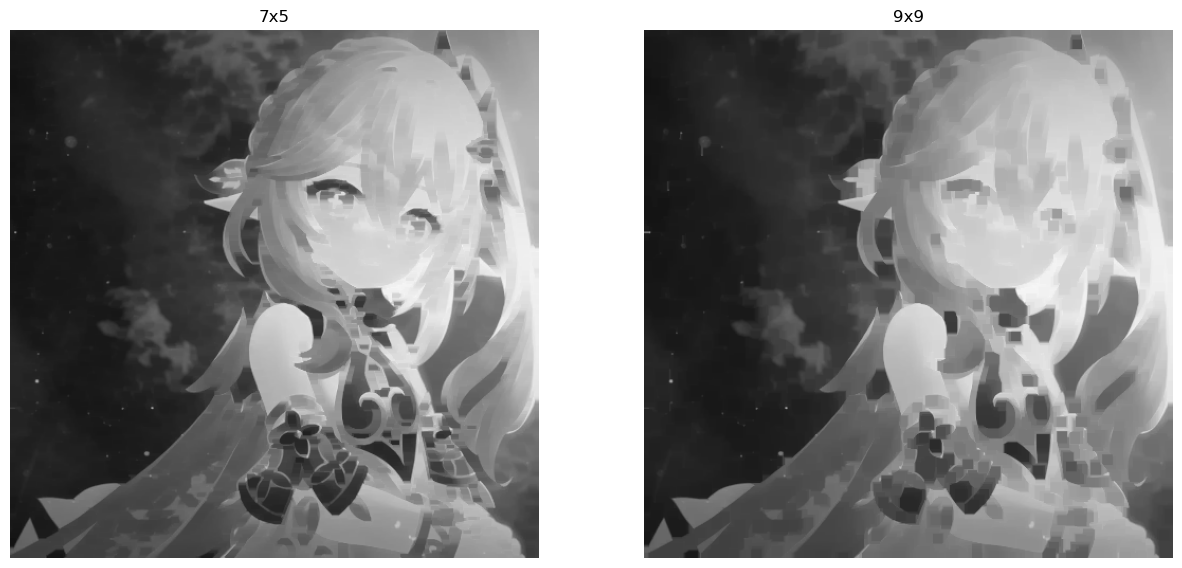

In [8]:
img = cv2.imread('pictures/nah.jpg',0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 3))
result = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
result1 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel1)

plt.figure(figsize=(15,10))
plt.subplot(121), plt.imshow(result), plt.title('7x5')
plt.axis('off')
plt.subplot(122), plt.imshow(result1), plt.title('9x9')
plt.axis('off')
plt.show();